In [31]:
#install.packages("tidyverse")

In [32]:
library(tidyverse)

In [62]:
datos <- read.csv("../../datasets/transactions.csv")
datos

content_id,items
<int>,<chr>
1,"duracion_promedio_vistas bajas, Friday, vistas altas, tiempo_reproduccion_horas altas, suscriptores altos, impresiones altas, ctr bajo, Trivia Facts Quiz, General, Blue"
2,"duracion_promedio_vistas altas, Thursday, vistas altas, tiempo_reproduccion_horas altas, suscriptores media, impresiones altas, ctr medio, Entertainment Quiz, General, Blue"
3,"duracion_promedio_vistas bajas, Friday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores media, impresiones altas, ctr alto, Trivia Facts Quiz, Children, Pink"
4,"duracion_promedio_vistas medias, Thursday, vistas altas, tiempo_reproduccion_horas medias, suscriptores media, impresiones altas, ctr medio, Entertainment Quiz, General, Blue"
5,"duracion_promedio_vistas altas, Friday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr bajo, Would You Rather, General, Yellow"
8,"duracion_promedio_vistas medias, Thursday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr medio, Holidays, General, Purple"
15,"duracion_promedio_vistas altas, Wednesday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr bajo, Would You Rather, General, Purple"
16,"duracion_promedio_vistas medias, Thursday, vistas medias, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones medias, ctr bajo, Would You Rather, Children, Purple"
18,"duracion_promedio_vistas altas, Friday, vistas medias, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr bajo, Would You Rather, General, White"


In [72]:
datos$content_id <- NULL
colnames(datos) <- c("items")

In [73]:
write.csv(datos, "../../datasets/transactions.csv", quote = FALSE, row.names = TRUE)
head(datos)

,items
,<chr>
1,"duracion_promedio_vistas bajas, Friday, vistas altas, tiempo_reproduccion_horas altas, suscriptores altos, impresiones altas, ctr bajo, Trivia Facts Quiz, General, Blue"
2,"duracion_promedio_vistas altas, Thursday, vistas altas, tiempo_reproduccion_horas altas, suscriptores media, impresiones altas, ctr medio, Entertainment Quiz, General, Blue"
3,"duracion_promedio_vistas bajas, Friday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores media, impresiones altas, ctr alto, Trivia Facts Quiz, Children, Pink"
4,"duracion_promedio_vistas medias, Thursday, vistas altas, tiempo_reproduccion_horas medias, suscriptores media, impresiones altas, ctr medio, Entertainment Quiz, General, Blue"
5,"duracion_promedio_vistas altas, Friday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr bajo, Would You Rather, General, Yellow"
6,"duracion_promedio_vistas medias, Thursday, vistas altas, tiempo_reproduccion_horas bajas, suscriptores bajos, impresiones altas, ctr medio, Holidays, General, Purple"


In [76]:
# IMPORTACIÓN DIRECTA DE LOS DATOS A UN OBJETO TIPO TRANSACTION
# ==============================================================================
library(arules)
transacciones <- read.transactions(
    file = "../../datasets/transactions.csv",
    format = "basket",
    sep = ",",
    cols = 1,
    rm.duplicates = TRUE
)
transacciones



transactions in sparse format with
 22 transactions (rows) and
 39 items (columns)

In [77]:
inspect(transacciones[1:21])

     items                               transactionID
[1]  {}                                          items
[2]  {Blue,                                           
      ctr bajo,                                       
      duracion_promedio_vistas bajas,                 
      Friday,                                         
      General,                                        
      impresiones altas,                              
      suscriptores altos,                             
      tiempo_reproduccion_horas altas,                
      Trivia Facts Quiz,                              
      vistas altas}                              1    
[3]  {Blue,                                           
      ctr medio,                                      
      duracion_promedio_vistas altas,                 
      Entertainment Quiz,                             
      General,                                        
      impresiones altas,                              
      susc

In [78]:
df_transacciones <- as(transacciones, Class = "data.frame")
# Para que el tamaño de la tabla se ajuste mejor, se convierte el dataframe a tibble
as.tibble(df_transacciones) %>% head()

items,transactionID
<chr>,<chr>
{},items
"{Blue,ctr bajo,duracion_promedio_vistas bajas,Friday,General,impresiones altas,suscriptores altos,tiempo_reproduccion_horas altas,Trivia Facts Quiz,vistas altas}",1
"{Blue,ctr medio,duracion_promedio_vistas altas,Entertainment Quiz,General,impresiones altas,suscriptores media,Thursday,tiempo_reproduccion_horas altas,vistas altas}",2
"{Children,ctr alto,duracion_promedio_vistas bajas,Friday,impresiones altas,Pink,suscriptores media,tiempo_reproduccion_horas bajas,Trivia Facts Quiz,vistas altas}",3
"{Blue,ctr medio,duracion_promedio_vistas medias,Entertainment Quiz,General,impresiones altas,suscriptores media,Thursday,tiempo_reproduccion_horas medias,vistas altas}",4
"{ctr bajo,duracion_promedio_vistas altas,Friday,General,impresiones altas,suscriptores bajos,tiempo_reproduccion_horas bajas,vistas altas,Would You Rather,Yellow}",5


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">

## Para extraer el tamaño de cada transacción se emplea la función size().
</div>
<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">
    <p>
        La función size() se utiliza para extraer el tamaño de cada transacción en el conjunto de datos.
    </p>
</div>

In [79]:
tamanyos <- size(transacciones)
summary(tamanyos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000  10.000  10.000   9.545  10.000  10.000 

In [82]:
quantile(tamanyos, probs = seq(0, 1, 0.1))

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
   0   10   10   10   10   10   10   10   10   10   10

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


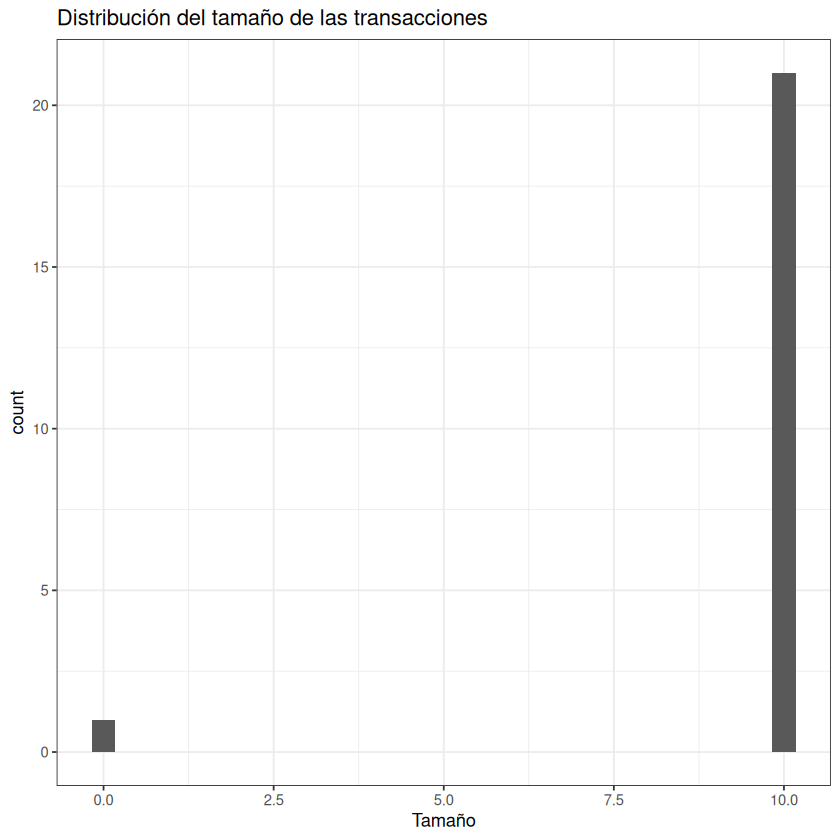

In [83]:
data.frame(tamanyos) %>%
    ggplot(aes(x = tamanyos)) +
    geom_histogram() +
    labs(
        title = "Distribución del tamaño de las transacciones",
        x = "Tamaño"
    ) +
    theme_bw()

In [81]:
frecuencia_items <- itemFrequency(x = transacciones, type = "relative")
frecuencia_items %>%
    sort(decreasing = TRUE) %>%
    head(5)

tiempo_reproduccion_horas bajas              suscriptores bajos 
                      0.8181818                       0.7727273 
                       Children                         General 
                      0.5000000                       0.4545455 
                           Blue 
                      0.4090909

In [84]:
soporte <- 2 / dim(transacciones)[1]
itemsets <- apriori(
    data = transacciones,
    parameter = list(
        support = soporte,
        minlen = 1,
        maxlen = 20,
        target = "frequent itemset"
    )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime    support minlen
         NA    0.1    1 none FALSE            TRUE       5 0.09090909      1
 maxlen            target  ext
     20 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39 item(s), 22 transaction(s)] done [0.00s].
sorting and recoding items ... [31 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [2562 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [85]:
summary(itemsets)

set of 2562 itemsets

most frequent items:
tiempo_reproduccion_horas bajas              suscriptores bajos 
                           1117                            1104 
                       Children                        Thursday 
                            752                             536 
                           Blue                         (Other) 
                            523                            6749 

element (itemset/transaction) length distribution:sizes
  1   2   3   4   5   6   7   8   9 
 31 215 559 736 584 306 107  22   2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.208   5.000   9.000 

summary of quality measures:
    support            count       
 Min.   :0.09091   Min.   : 2.000  
 1st Qu.:0.09091   1st Qu.: 2.000  
 Median :0.09091   Median : 2.000  
 Mean   :0.11475   Mean   : 2.525  
 3rd Qu.:0.13636   3rd Qu.: 3.000  
 Max.   :0.81818   Max.   :18.000  

includes transaction ID lists: FALSE 

mining info:
  

In [86]:
# Se muestran los top 20 itemsets de mayor a menor soporte
top_20_itemsets <- sort(itemsets, by = "support", decreasing = TRUE)[1:20]
inspect(top_20_itemsets)

     items                               support count
[1]  {tiempo_reproduccion_horas bajas} 0.8181818    18
[2]  {suscriptores bajos}              0.7727273    17
[3]  {suscriptores bajos,                             
      tiempo_reproduccion_horas bajas} 0.7727273    17
[4]  {Children}                        0.5000000    11
[5]  {Children,                                       
      tiempo_reproduccion_horas bajas} 0.5000000    11
[6]  {General}                         0.4545455    10
[7]  {Children,                                       
      suscriptores bajos}              0.4545455    10
[8]  {Children,                                       
      suscriptores bajos,                             
      tiempo_reproduccion_horas bajas} 0.4545455    10
[9]  {Blue}                            0.4090909     9
[10] {Thursday}                        0.4090909     9
[11] {duracion_promedio_vistas bajas}  0.4090909     9
[12] {ctr bajo}                        0.4090909     9
[13] {Triv

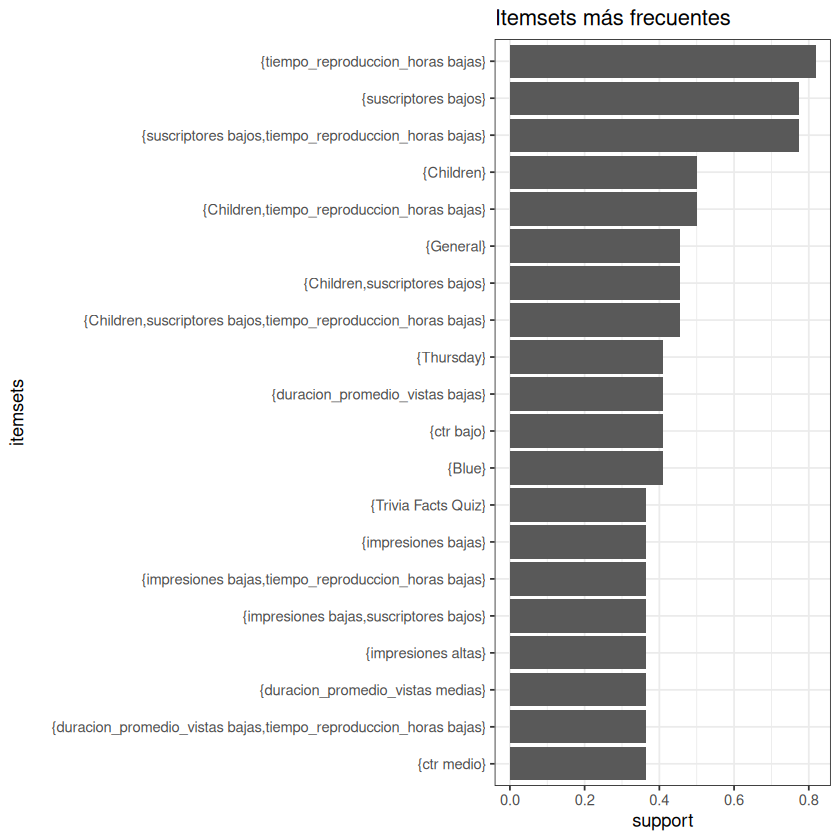

In [87]:
# Para representarlos con ggplot se convierte a dataframe
as(top_20_itemsets, Class = "data.frame") %>%
    ggplot(aes(x = reorder(items, support), y = support)) +
    geom_col() +
    coord_flip() +
    labs(title = "Itemsets más frecuentes", x = "itemsets") +
    theme_bw()

In [88]:
# Se muestran los 20 itemsets más frecuentes formados por más de un item.
inspect(sort(itemsets[size(itemsets) > 1], decreasing = TRUE)[1:20])

     items                                support count
[1]  {suscriptores bajos,                              
      tiempo_reproduccion_horas bajas}  0.7727273    17
[2]  {Children,                                        
      tiempo_reproduccion_horas bajas}  0.5000000    11
[3]  {Children,                                        
      suscriptores bajos}               0.4545455    10
[4]  {Children,                                        
      suscriptores bajos,                              
      tiempo_reproduccion_horas bajas}  0.4545455    10
[5]  {impresiones bajas,                               
      suscriptores bajos}               0.3636364     8
[6]  {impresiones bajas,                               
      tiempo_reproduccion_horas bajas}  0.3636364     8
[7]  {duracion_promedio_vistas bajas,                  
      tiempo_reproduccion_horas bajas}  0.3636364     8
[8]  {ctr bajo,                                        
      suscriptores bajos}               0.363636

In [91]:
vector_vistas <- c("vistas medias", "vistas altas")
vector_impresiones <- c("impresiones bajas", "impresiones altas")
vector_suscriptores <- c("suscriptores bajos")
vector_tiempo_reproduccion <- c("tiempo_reproduccion_horas bajas")
vector_duracion_vistas <- c("duracion_promedio_vistas medias", "duracion_promedio_vistas altas")

itemsets_filtrado <- arules::subset(itemsets,
    subset = items %ain% vector_vistas | items %ain% vector_impresiones | items %ain% vector_suscriptores |
        items %ain% vector_tiempo_reproduccion | items %ain% vector_duracion_vistas
)
itemsets_filtrado

set of 1669 itemsets 

In [92]:
# Se muestran 10 de ellos
inspect(itemsets_filtrado[1:10])

     items                                           support    count
[1]  {suscriptores bajos}                            0.77272727 17   
[2]  {tiempo_reproduccion_horas bajas}               0.81818182 18   
[3]  {Holidays, suscriptores bajos}                  0.09090909  2   
[4]  {Holidays, tiempo_reproduccion_horas bajas}     0.09090909  2   
[5]  {Pink, tiempo_reproduccion_horas bajas}         0.09090909  2   
[6]  {Animals Quiz, suscriptores bajos}              0.09090909  2   
[7]  {Animals Quiz, tiempo_reproduccion_horas bajas} 0.09090909  2   
[8]  {Gray, suscriptores bajos}                      0.09090909  2   
[9]  {Gray, tiempo_reproduccion_horas bajas}         0.09090909  2   
[10] {Nature Quiz, suscriptores bajos}               0.09090909  2   


In [93]:
# Para encontrar los subsets dentro de un conjunto de itemsets, se compara el
# conjunto de itemsets con sigo mismo.
subsets <- is.subset(x = itemsets, y = itemsets, sparse = FALSE)

In [94]:
# La suma de una matriz lógica devuelve el número de TRUEs
sum(subsets)

[1] 73232

In [106]:
soporte <- 8 / dim(transacciones)[1]
reglas <- apriori(
    data = transacciones,
    parameter = list(
        support = soporte,
        confidence = 0.70,
        # Se especifica que se creen reglas
        target = "rules"
    )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime   support minlen
        0.7    0.1    1 none FALSE            TRUE       5 0.3636364      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39 item(s), 22 transaction(s)] done [0.00s].
sorting and recoding items ... [13 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [107]:
summary(reglas)

set of 17 rules

rule length distribution (lhs + rhs):sizes
1 2 3 
2 9 6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.235   3.000   3.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.3636   Min.   :0.7727   Min.   :0.3636   Min.   :1.000  
 1st Qu.:0.3636   1st Qu.:0.8889   1st Qu.:0.3636   1st Qu.:1.150  
 Median :0.3636   Median :1.0000   Median :0.4091   Median :1.222  
 Mean   :0.4866   Mean   :0.9424   Mean   :0.5267   Mean   :1.183  
 3rd Qu.:0.5000   3rd Qu.:1.0000   3rd Qu.:0.5000   3rd Qu.:1.222  
 Max.   :0.8182   Max.   :1.0000   Max.   :1.0000   Max.   :1.294  
     count      
 Min.   : 8.00  
 1st Qu.: 8.00  
 Median : 8.00  
 Mean   :10.71  
 3rd Qu.:11.00  
 Max.   :18.00  

mining info:
          data ntransactions   support confidence
 transacciones            22 0.3636364        0.7
                                                                                        

In [108]:
inspect(sort(x = reglas, decreasing = TRUE, by = "confidence"))

     lhs                                  rhs                                 support confidence  coverage     lift count
[1]  {impresiones bajas}               => {suscriptores bajos}              0.3636364  1.0000000 0.3636364 1.294118     8
[2]  {impresiones bajas}               => {tiempo_reproduccion_horas bajas} 0.3636364  1.0000000 0.3636364 1.222222     8
[3]  {Children}                        => {tiempo_reproduccion_horas bajas} 0.5000000  1.0000000 0.5000000 1.222222    11
[4]  {suscriptores bajos}              => {tiempo_reproduccion_horas bajas} 0.7727273  1.0000000 0.7727273 1.222222    17
[5]  {impresiones bajas,                                                                                                 
      suscriptores bajos}              => {tiempo_reproduccion_horas bajas} 0.3636364  1.0000000 0.3636364 1.222222     8
[6]  {impresiones bajas,                                                                                                 
      tiempo_reproduccio

In [148]:
colores <- c("Blue", "Pink", "Yellow", "Purple", "White", "Gray", "Beige", "Indigo")
rhs_values <- c("impresiones medias", "suscriptores media", "vistas altas", "vistas medias", "ctr alto", "ctr medio")

soporte <- 2 / dim(transacciones)[1]
reglas_suscriptores_medias <- apriori(data = transacciones,
                             parameter = list(support = soporte,
                                              confidence = 0.70,
                                             # Se especifica que se creen reglas
                                              target = "rules"),
                             appearance = list(rhs = rhs_values, lhs = colores))
inspect(reglas_suscriptores_medias)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime    support minlen
        0.7    0.1    1 none FALSE            TRUE       5 0.09090909      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[14 item(s)] done [0.00s].
set transactions ...[14 item(s), 22 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs       rhs             support    confidence coverage   lift     count
[1] {Gray} => {vistas medias} 0.09090909 1          0.09090909 3.142857 2    
[2] {Gray} => {ctr medio}     0.09090909 1          0.09090909 2.750000 2    


In [132]:
inspect(reglas_suscriptores_medias)

     lhs                                   rhs               support confidence  coverage     lift count
[1]  {impresiones medias}               => {vistas medias} 0.1818182        0.8 0.2272727 2.514286     4
[2]  {Children,                                                                                         
      impresiones medias}               => {vistas medias} 0.1818182        1.0 0.1818182 3.142857     4
[3]  {impresiones medias,                                                                               
      suscriptores bajos}               => {vistas medias} 0.1818182        0.8 0.2272727 2.514286     4
[4]  {impresiones medias,                                                                               
      tiempo_reproduccion_horas bajas}  => {vistas medias} 0.1818182        0.8 0.2272727 2.514286     4
[5]  {Children,                                                                                         
      duracion_promedio_vistas medias}  => {vistas medi

In [150]:
# Se identifica la regla con mayor confianza
as(reglas, "data.frame") %>%
    arrange(desc(confidence)) %>%
    head(3) %>%
    pull(rules)

[1] "{impresiones bajas} => {suscriptores bajos}"             
[2] "{impresiones bajas} => {tiempo_reproduccion_horas bajas}"
[3] "{Children} => {tiempo_reproduccion_horas bajas}"

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    
   ##  Bibliografía
</div>
<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <p>
        Reglas de asociación y algoritmo Apriori con R por Joaquín Amat Rodrigo, disponible con licencia CC BY-NC-SA 4.0 en <a href="https://www.cienciadedatos.net/documentos/43_reglas_de_asociacion">https://www.cienciadedatos.net/documentos/43_reglas_de_asociacion</a>
    </p>
</div>
